#회귀 모델
- 선형 회귀

독립변수와 종속변수 사이에 선형적인 관계를 가정하고 관계를 찾아냄

회귀 알고리즘은 비용함수가 최소가 되는 직선을 찾는 과정

비용 함수: 정답과 예측의 차이를 계산하는 함수 ex)mes

- 최소 제곱법

- 경사 하강법: 손실함수를 최소화하기 위해 사용되는 최적화 알고리즘

Cost 계산 후 기울기가 감소하는 쪽으로 이동 -> 미분했을 때 기울기가 0 일때까지

얼마나 이동할 것인가는 학습률에 달림 ex.0.001

학습률*기울기 만큼 움직임 -> 랜덤값이 정답에서 멀면 많이 움직이도록 하기 위해서

** 경사 하강법, 딥러닝 전파 역전파 설명하라고 면접에서 시키는 경우 있음

기울기가 0 일때까지 하는 경우보다 epoch를 정해서 돌리는 경우가 있고 이동할때마다 1 epoch 임

경사 하강법
- 배치 경사 하강법
- 확률적 경사 하강법
- 미니 배치 경사 하강법

##다항회귀

과적합 확률이 높기 때문에 다양한 규제를 실행함 ex) 릿지, 랏소 (손실함수에 패널티 부여)

##로지스틱 회귀(이진분류 알고리즘임)

선형수식으로 진행하는 이진분류의 단점을 보완하고자 시그모이드 함수 형태로 바꿈

mse로는 최적화를 할 수가 없음으로 크로스 엔트로피를 활용함

다중분류를 위해서는 이중 분류기가 여러개 있는 형태로 할 수 있으나 소프트맥스를 활용

**애초에 인풋으로 0 아님 1일텐데 어떻게 소수점이 나오지...?

**이중 분류기에서 분류기 마다 가중치 및 중요도가 다를 수 있지 않나

다중 분류일 때는 확률값을 모두 더하면 1이 나올 수 있도록 시그모이드 함수 대신 소프트맥스(활성화 함수) 활용

이진분류: 시그모이드

다중분류: 소프트맥스(트랜스포머에도 들어있음/출력이 여러개일때 계산해서 합이 1이 되게 만드는 함수)

소프트맥스 확률을 원핫 인코딩하여 출력하여 사용하고 손실 함수로는 카테고리컬 크로스엔트로피 활용함

# 뉴럴 네트워크

- 퍼셉트론

단층 퍼셉트론은 단순 이중 분류에 활용될 수 있음

다층 퍼셉트론은 차원이 바뀌어서 비선형 문제를 해결할 수 있음

하지만, 학습이 안되는 치명적인 단점이 있음

오차역전파를 활용해 다시 딥러닝이 사용됨

##오차역전파

첫 학습 후 정답값하고 오차값 사이에서 에러값을 추출하고 각 가중치로 에러값을 미분해서 학습률을 곱해서 빼주는 방식으로 가중치를 조정해줌(결국 경사 하강법)

##기울기소실

깊은 신경망의 경우 뒤로올수록 미분값이 사라져서 학습이 안되는 경우

시그모이드 함수가 원인으로 소수가 곱해지며 소실되고 ReLU라는 함수를 사용하여 해결


####케라스 레이어 활용하여 딥러닝 실습 진행 예정

# 뉴럴네트워크(회귀)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras

##1.데이터 준비

In [2]:
X_train = np.array([1.,2.,3.,4.,5.,6.])
y_train = np.array([9.,12,15,18,21,24])

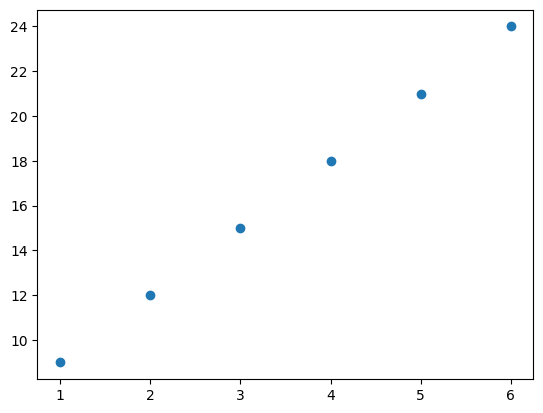

In [3]:
plt.scatter(X_train, y_train)

##2.사이킷런 선형회귀

In [4]:
# 일차원
X_train

array([1., 2., 3., 4., 5., 6.])

In [6]:
X_train = X_train.reshape(-1,1)
X_train

array([[1.],
       [2.],
       [3.],
       [4.],
       [5.],
       [6.]])

In [25]:
from sklearn.linear_model import LinearRegression

# 기본적으로 인풋으로 이차원이 들어가야 함
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [26]:
# 기울기, y절편
lr.coef_, lr.intercept_

(array([3.]), 5.999999999999998)

##3.예측

In [27]:
# lr.predict([10]) 이렇게 넣으면 이차원 아니라서 오류가 남
# 딥러닝이나 선형 쪽은 이차원 이상으로 넣어야 함
lr.predict([[10.]])

array([36.])

##4.뉴럴네트워크 사용

### 모델 구성

In [32]:
from keras import layers

# Sequential 차례차례 레이어를 쌓겠다
# 레이어 추가하면 댐
model = keras.Sequential([
    # 하나씩 들어온다
    layers.Input(shape=(1,)),
    layers.Dense(units=1)
])

In [33]:
# 유닛 하나에 바이어스 하나씩 붙어있음
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

###컴파일
- 손실함수, 경사하강법(옵티마이저), 메트릭스(MAE, MSE..., 학습 잘되고 있는지 판단하는 근거)

In [34]:
model.compile(
    optimizer='sgd',
    loss='mse',
    metrics=['mse']
)

In [35]:
epochs = 500
model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=len(X_train)
)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step - loss: 531.7870 - mse: 531.7870
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 248.3729 - mse: 248.3729
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 117.1840 - mse: 117.1840
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 56.4496 - mse: 56.4496
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 28.3238 - mse: 28.3238
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 15.2903 - mse: 15.2903
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 9.2421 - mse: 9.2421
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 6.4271 - mse: 6.4271
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 5.1085 - mse: 5.1085
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 4.4827 - mse: 4.4827
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 4.1776 - mse: 4.1776
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 4.0211 - mse: 4.0211
Epoch 13/500
1/1 ━━━━━━━━━━━━

In [36]:
# 학습 파라미터 확인
# 결정된 가중치, 편향 확인

model.get_weights()

[array([[3.1761954]], dtype=float32), array([5.245672], dtype=float32)]

##예측

In [37]:
model.predict(np.array([[10]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


array([[37.007626]], dtype=float32)